# Subramanyam Sahoo
## lab 4 assignment
## 22MCS107
## M.Tech cse (AI)

1. Apply PCA using iris dataset. 
2. [22, 87, 5, 43, 56,73, 55, 54, 11,20, 51, 5, 79, 31,27]
Plot a histogram using above list and draw bins in it.
3. Do min max scaling in below data and form a data frame
z-score normalization and decimal scaling.
(You can also use your own data.)
 [[180000, 110, 18.9, 1400],
 [360000, 905, 23.4, 1800],
 [230000, 230, 14.0, 1300],
 [60000, 450, 13.5, 1500]]
4. Perform binning in iris dataset (mean, boundaries, median)
5. Apply wavelet-based data reduction.
6. Apply sampling based data reduction.

In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

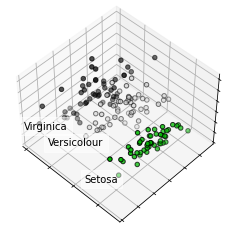

In [10]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

explained variance ratio (first two components): [0.92461872 0.05306648]


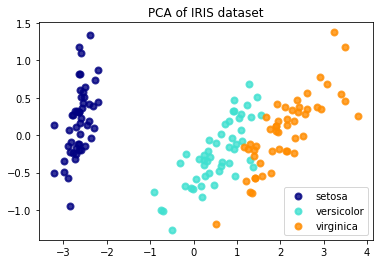

In [18]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA


iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.show()

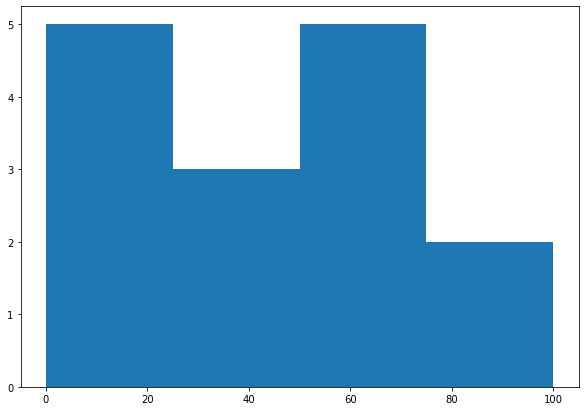

In [5]:
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
a = np.array([22, 87, 5, 43, 56,73, 55, 54, 11,20, 51, 5, 79, 31,27])

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 25, 50, 75, 100])

# Show plot
plt.show()


In [1]:
import pandas as pd
df_z_scaled = pd.DataFrame(
 [[180000, 110, 18.9, 1400],
 [360000, 905, 23.4, 1800],
 [230000, 230, 14.0, 1300],
 [60000, 450, 13.5, 1500]]
)

df_z_scaled


,0,1,2,3
0,180000,110,18.9,1400
1,360000,905,23.4,1800
2,230000,230,14.0,1300
3,60000,450,13.5,1500


In [23]:
# apply normalization techniques Z score

for column in df_z_scaled.columns:
	df_z_scaled[column] = (df_z_scaled[column] -
						df_z_scaled[column].mean()) / df_z_scaled[column].std()	

# view normalized data
display(df_z_scaled)


,0,1,2,3
0,-0.221422,-0.895492,0.311486,-0.46291
1,1.227884,1.373564,1.278167,1.38873
2,0.181163,-0.552993,-0.741122,-0.92582
3,-1.187625,0.074922,-0.848531,0.00000


<AxesSubplot:>

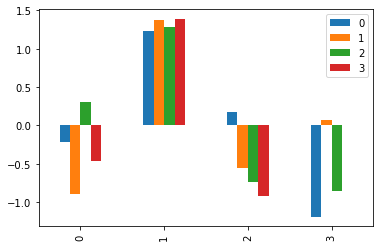

In [24]:
import matplotlib.pyplot as plt
df_z_scaled.plot(kind='bar')

In [3]:
import pandas as pd 
df_min_max_scaled = pd.DataFrame(
 [[180000, 110, 18.9, 1400],
 [360000, 905, 23.4, 1800],
 [230000, 230, 14.0, 1300],
 [60000, 450, 13.5, 1500]]
)
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)

          0         1         2    3
0  0.400000  0.000000  0.545455  0.2
1  1.000000  1.000000  1.000000  1.0
2  0.566667  0.150943  0.050505  0.0
3  0.000000  0.427673  0.000000  0.4


In [44]:
#  Decimal scaling
a = np.array([[180000, 110, 18.9, 1400],
              [360000, 905, 23.4, 1800], 
              [230000, 230, 14.0, 1300], 
              [60000, 450, 13.5, 1500]])
max_Value=np.max(a)
# print(max_Value)
num=0;
while max_Value>1:
#     print(max_Value)
    max_Value=max_Value/10
    num=num+1
# print(max_Value)
# print(a)
# print(num)
a=a/pow(10,num)
# print(a)
output=pd.DataFrame(a)
output
        


,0,1,2,3
0,0.18,0.000110,0.000019,0.0014
1,0.36,0.000905,0.000023,0.0018
2,0.23,0.000230,0.000014,0.0013
3,0.06,0.000450,0.000013,0.0015


<AxesSubplot:>

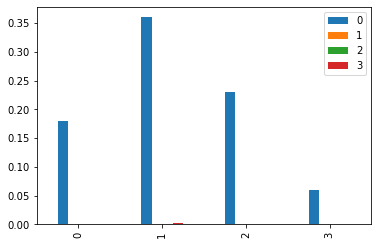

In [45]:
import matplotlib.pyplot as plt
output.plot(kind='bar')

In [3]:
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics

# load iris data set
dataset = load_iris()
a = dataset.data
b = np.zeros(150)

# take 1st column among 4 column of data set
for i in range (150):
	b[i]=a[i,1]

b=np.sort(b) #sort the array

# create bins
bin1=np.zeros((30,5))
bin2=np.zeros((30,5))
bin3=np.zeros((30,5))

# Bin mean
for i in range (0,150,5):
	k=int(i/5)
	mean=(b[i] + b[i+1] + b[i+2] + b[i+3] + b[i+4])/5
	for j in range(5):
		bin1[k,j]=mean
print("Bin Mean: \n",bin1)
	
# Bin boundaries
for i in range (0,150,5):
	k=int(i/5)
	for j in range (5):
		if (b[i+j]-b[i]) < (b[i+4]-b[i+j]):
			bin2[k,j]=b[i]
		else:
			bin2[k,j]=b[i+4]
print("Bin Boundaries: \n",bin2)

# Bin median
for i in range (0,150,5):
	k=int(i/5)
	for j in range (5):
		bin3[k,j]=b[i+2]
print("Bin Median: \n",bin3)


Bin Mean: 
 [[2.18 2.18 2.18 2.18 2.18]
 [2.34 2.34 2.34 2.34 2.34]
 [2.48 2.48 2.48 2.48 2.48]
 [2.52 2.52 2.52 2.52 2.52]
 [2.62 2.62 2.62 2.62 2.62]
 [2.7  2.7  2.7  2.7  2.7 ]
 [2.74 2.74 2.74 2.74 2.74]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.86 2.86 2.86 2.86 2.86]
 [2.9  2.9  2.9  2.9  2.9 ]
 [2.96 2.96 2.96 2.96 2.96]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.04 3.04 3.04 3.04 3.04]
 [3.1  3.1  3.1  3.1  3.1 ]
 [3.12 3.12 3.12 3.12 3.12]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.26 3.26 3.26 3.26 3.26]
 [3.34 3.34 3.34 3.34 3.34]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.5  3.5  3.5  3.5  3.5 ]
 [3.58 3.58 3.58 3.58 3.58]
 [3.74 3.74 3.74 3.74 3.74]
 [3.82 3.82 3.82 3.82 3.82]
 [4.12 4.12 4.12 4.12 4.12]]
Bin Boundaries: 
 [[2.  2.3 2.3 2.3 2.3]
 [2.3 2.3 2.3 2.4 2.4]
 [2.4 2.5 2.5 2.5 2.5]
 [2.5 2.5 2.5 2.5 2.6]
 [2.6 2.6 2.6 2.6 2.7]
 [2.7 2.7 2.7 

In [4]:
##Wavelet based data reduction
import pywt
print(pywt.families(short=False))
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 
'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 
'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

C:\Users\asus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


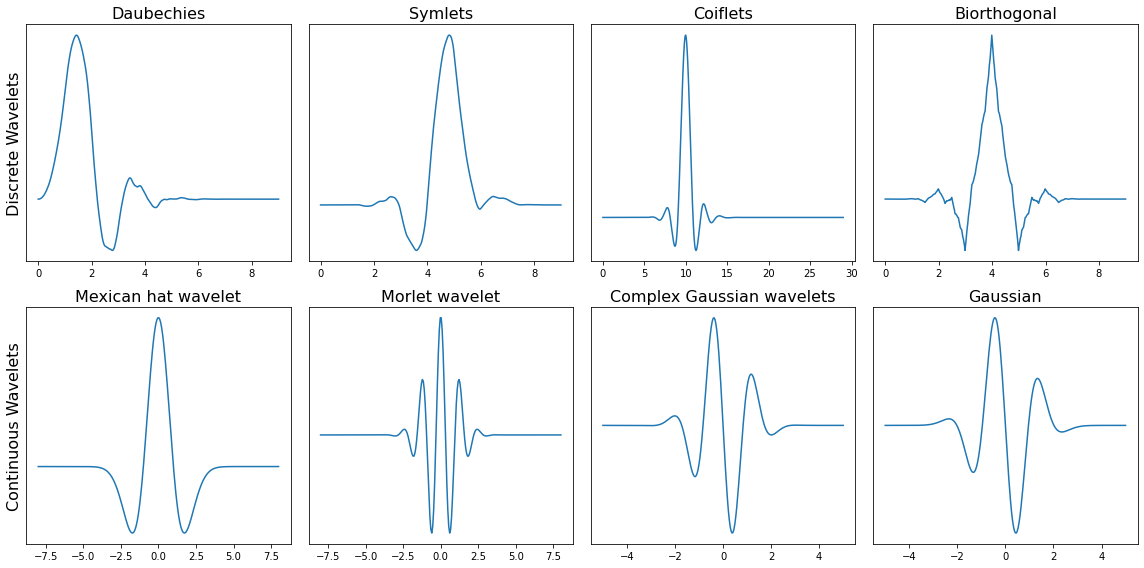

In [5]:

discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

In [14]:
## sampling based data reduction
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df.shape

(150, 4)

In [16]:
## random sampling

subset = df.sample(n=100)
subset.shape

(100, 4)

In [17]:
## Knowning the percentage of samples to return
subset = df.sample(frac=0.5)
subset.shape

(75, 4)

In [19]:
##Sampling with condition
##Return 10 random sample where sepal width (cm) < 3 
##Firstly count the number of records which satisfy the condition

condition = df['sepal width (cm)'] < 3
condition

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146     True
147    False
148    False
149    False
Name: sepal width (cm), Length: 150, dtype: bool

In [20]:
true_index = condition[condition == True].index
len(true_index)

57

In [22]:
subset = df[condition].sample(n = 10)
subset.shape

(10, 4)

In [23]:
##Sampling at a Constant Rate
rate = 10
subset = df[::rate]
subset.shape

(15, 4)

In [24]:
subset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
10,5.4,3.7,1.5,0.2
20,5.4,3.4,1.7,0.2
30,4.8,3.1,1.6,0.2
40,5.0,3.5,1.3,0.3


In [25]:
##Getting the remaining part of the dataset

remaining = df.drop(labels=subset.index)
remaining.shape

(135, 4)

In [26]:
remaining.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
